In [2]:
import os
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

AUDIO ANALYSIS

First exploration of audio files performed by imotions

In [3]:

folder = '/Users/laura/Documents/RICHEMONT/New data/Audio Analysis/Sensor Data/'

files = [f for f in os.listdir(folder) if f.endswith('.csv')]


for i, file in enumerate(files):
    print(f"{i + 1}. {file}")




1. 009_20250320102209.csv
2. 003_20250319111137.csv
3. 010_20250320102703.csv
4. 007_20250319175930.csv
5. 013_20250320161803.csv
6. 002_20250319110316.csv
7. 011_20250320102819.csv
8. 004_20250319114114.csv
9. 008_20250320101302.csv
10. 013_20250320161803- expanded .csv
11. 012_20250320130748.csv
12. 001_20250319100559.csv
13. 006_20250319161509.csv
14. 005_20250319141434.csv


In [4]:
selector = widgets.Dropdown(
    options=files,
    description='File:',
    layout=widgets.Layout(width='50%')
)

load_button = widgets.Button(description="Load File", button_style='success')

output = widgets.Output()

def load_file(b):
    global df
    selected_file = selector.value
    path_user = os.path.join(folder, selected_file)
    df = pd.read_csv(path_user)
    
    with output:
        output.clear_output()
        print(f"Loaded file: {selected_file}")
        display(df.head())

display(widgets.VBox([selector, load_button, output]))
load_button.on_click(load_file)

In [5]:
data = df[df.iloc[:, 0] == '#DATA'].index[0]
df_clean = df.iloc[data + 1:].copy()
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.iloc[1:]

df_clean = df_clean.reset_index(drop=True)
df_clean['Timestamp'] = pd.to_numeric(df_clean['Timestamp'], errors='coerce')

In [6]:
#Segmentin shops

from datetime import datetime, timedelta

start_recording =datetime.strptime("10:05", "%H:%M")

shops = {
    "Boutique1": ("11:29", "12:03"),
    "Boutique2": ("12:03", "12:45"),
    "Boutique3": ("12:45", "13:14")
}

range_shops = {}
for name, (ini_str, fin_str) in shops.items():
    start = datetime.strptime(ini_str, "%H:%M") - start_recording
    end = datetime.strptime(fin_str, "%H:%M") - start_recording
    range_shops[name] = (start.total_seconds() * 1000, end.total_seconds() * 1000)

segments = {}
for shop, (start_ms, end_ms) in range_shops.items():
    segments[shop] = df_clean[
        (df_clean['Timestamp'] >= start_ms) & (df_clean['Timestamp'] < end_ms)
    ]
for shop, df_shop in segments.items():


    start_ms = df_shop['Timestamp'].min()
    end_ms = df_shop['Timestamp'].max()
    duration_min = (end_ms - start_ms) / 60000  
    print(f"{shop}: {duration_min:.2f} mins")



Boutique1: 34.00 mins
Boutique2: 42.00 mins
Boutique3: 29.00 mins


Explanation IMOTIONS

			Metric	Expected Range	What it Represents
Voice_Anger	0 – 1	How angry the speaker sounds. 0 = not angry, 1 = very angry.
Voice_Happiness	0 – 1	How happy the speaker sounds.
Voice_Neutrality	0 – 1	How neutral the speaker sounds.
Voice_Sadness	0 – 1	How sad the speaker sounds.
Voice_Activation	-1 – 1	Emotional energy level. Negative = more calm, positive = more intense.
Voice_Dominance	-1 – 1	How controlling or dominant the voice sounds.
Voice_Valence	-1 – 1	Overall emotional positivity. Negative = negative emotion, positive = positive.
Voice_F0_minimum	Hz (e.g., 60–1000)	Minimum fundamental frequency detected. Depends on the speaker.
Voice_F0_maximum	Hz	Maximum pitch value detected.
Voice_F0_average	Hz	Average pitch. Typical male ~120 Hz, female ~200 Hz.
Voice_F0_variation	Hz	Pitch variability (prosody). Higher = more expressive.
Voice_Loudness_minimum	Unitless	Minimum loudness detected (relative).
Voice_Loudness_maximum	Unitless	Maximum loudness detected (relative).
Voice_Loudness_average	Unitless	Average loudness.
Voice_Loudness_variation	Unitless	Variation in loudness.
Voice_Speaking_Rate	~2 – 6	Syllables per second. Conversational average ~4–5.
Voice_Speaking_Rate_Variation	seconds (var)	Variability between syllables. Lower = more consistent rhythm.
Voice_Intonation	0 – ∞	Monotony vs expressiveness (pitch variation). Higher = more lively.
Voice_Gender_Male_confidence	0 – 1	Confidence that the voice is male.
Voice_Gender_Female_confidence	0 – 1	Confidence that the voice is female.
Voice_Gender_Child_confidence	0 – 1	Confidence that the voice is a child.
Voice_Age	Years	Estimated speaker age. May fluctuate slightly across frames.				

In [8]:
df_1=segments['Boutique1']
df_2=segments['Boutique1']
df_3=segments['Boutique1']

In [24]:
df=df_1 # change for every daatset

#VOICE DURING AUDIO

df_voice = df[(df['Voice_Active'] == 1)].copy()






In [39]:
df

24,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource,SampleType,...,Voice_Loudness_maximum,Voice_Loudness_average,Voice_Loudness_variation,Voice_Speaking_Rate,Voice_Speaking_Rate_Variation,Voice_Intonation,Voice_Gender_Male_confidence,Voice_Gender_Female_confidence,Voice_Gender_Child_confidence,Voice_Age
51542,51543,5040000.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,1.163332,0.532273,0.213854,4.25532,0.115016,0.465849,0.999929,0.000056,0.000015,28.152302
51543,51544,5040100.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,1.163332,0.532273,0.213854,4.25532,0.115016,0.465849,0.999929,0.000056,0.000015,28.152302
51544,51545,5040200.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,1.163332,0.532273,0.213854,4.25532,0.115016,0.465849,0.999929,0.000056,0.000015,28.152302
51545,51546,5040300.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,1.163332,0.532273,0.213854,4.25532,0.115016,0.465849,0.999929,0.000056,0.000015,28.152302
51546,51547,5040400.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,1.163332,0.532273,0.213854,4.25532,0.115016,0.465849,0.999929,0.000056,0.000015,28.152302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72231,72232,7079500.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72232,72233,7079600.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72233,72234,7079700.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72234,72235,7079800.0,NaN,NaN,NaN,NaN,NaN,Voice Recording,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# SPEAKER
def estimate_gender(row):
    if row['Voice_Gender_Male_confidence'] > 0.7:
        return 'M'
    elif row['Voice_Gender_Female_confidence'] > 0.7:
        return 'F'
    else:
        return 'C'  # Child or ambiguous

def age_label(age):
    if pd.isna(age):
        return 'NA'
    return str(int(round(age)))  # redondear edad al entero más cercano

df_voice['Gender_Label'] = df_voice.apply(estimate_gender, axis=1)
df_voice['Age_Label'] = df_voice['Voice_Age'].apply(age_label)

df_voice['Speaker_Proxy'] = df_voice['Gender_Label'] + "_" + df_voice['Age_Label']
unique_speakers = df_voice['Speaker_Proxy'].unique()
print(f"\n🔊 Número de hablantes distintos: {len(unique_speakers)}\n")

for speaker in unique_speakers:
    gender, age = speaker.split('_')
    print(f"🗣️ {speaker} → GENDER: {gender}, AGE: {age}")




🔊 Número de hablantes distintos: 57

🗣️ M_28 → GENDER: M, AGE: 28
🗣️ M_51 → GENDER: M, AGE: 51
🗣️ M_54 → GENDER: M, AGE: 54
🗣️ M_31 → GENDER: M, AGE: 31
🗣️ M_36 → GENDER: M, AGE: 36
🗣️ M_38 → GENDER: M, AGE: 38
🗣️ M_61 → GENDER: M, AGE: 61
🗣️ M_30 → GENDER: M, AGE: 30
🗣️ M_33 → GENDER: M, AGE: 33
🗣️ M_46 → GENDER: M, AGE: 46
🗣️ C_65 → GENDER: C, AGE: 65
🗣️ M_23 → GENDER: M, AGE: 23
🗣️ M_22 → GENDER: M, AGE: 22
🗣️ M_25 → GENDER: M, AGE: 25
🗣️ M_67 → GENDER: M, AGE: 67
🗣️ M_53 → GENDER: M, AGE: 53
🗣️ M_35 → GENDER: M, AGE: 35
🗣️ M_50 → GENDER: M, AGE: 50
🗣️ M_72 → GENDER: M, AGE: 72
🗣️ M_34 → GENDER: M, AGE: 34
🗣️ M_71 → GENDER: M, AGE: 71
🗣️ M_27 → GENDER: M, AGE: 27
🗣️ M_29 → GENDER: M, AGE: 29
🗣️ M_65 → GENDER: M, AGE: 65
🗣️ M_47 → GENDER: M, AGE: 47
🗣️ M_45 → GENDER: M, AGE: 45
🗣️ M_32 → GENDER: M, AGE: 32
🗣️ M_21 → GENDER: M, AGE: 21
🗣️ M_41 → GENDER: M, AGE: 41
🗣️ M_42 → GENDER: M, AGE: 42
🗣️ C_28 → GENDER: C, AGE: 28
🗣️ C_22 → GENDER: C, AGE: 22
🗣️ C_26 → GENDER: C, AGE: 26
🗣️ M_

In [41]:
from sklearn.cluster import KMeans
import numpy as np


proxy_ages = df_voice.groupby('Speaker_Proxy')['Voice_Age'].mean().dropna()

X = proxy_ages.values.reshape(-1, 1)


kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)


proxy_to_real = dict(zip(proxy_ages.index, kmeans.labels_))


df_voice['Speaker_Real'] = df_voice['Speaker_Proxy'].map(proxy_to_real)


print(f"\Speaker after clusteirng (clustering): {df_voice['Speaker_Real'].nunique()}")

for real_speaker in sorted(df_voice['Speaker_Real'].unique()):
    edad_prom = df_voice[df_voice['Speaker_Real'] == real_speaker]['Voice_Age'].mean()
    print(f" Speaker {real_speaker} → AGE: {edad_prom:.1f} años")



\Speaker after clusteirng (clustering): 2
 Speaker 0 → AGE: 30.8 años
 Speaker 1 → AGE: 54.9 años


In [31]:
from sklearn.cluster import KMeans
import numpy as np

# 1. Edad promedio por proxy
proxy_ages = df_voice.groupby('Speaker_Proxy')['Voice_Age'].mean().dropna()
X = proxy_ages.values.reshape(-1, 1)

# 2. Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)

# 3. Asignar cluster a cada proxy
proxy_to_real = dict(zip(proxy_ages.index, kmeans.labels_))
df_voice['Speaker_Real'] = df_voice['Speaker_Proxy'].map(proxy_to_real)

# 4. Estimar género por Speaker_Real
speaker_summary = df_voice.groupby('Speaker_Real').agg({
    'Voice_Gender_Male_confidence': 'mean',
    'Voice_Gender_Female_confidence': 'mean',
    'Voice_Age': 'mean',
    'Speaker_Proxy': 'count'
}).rename(columns={'Speaker_Proxy': 'segments'})

# 5. Clasificar género dominante
def classify_gender(row):
    if row['Voice_Gender_Male_confidence'] > 0.7:
        return 'MALE'
    elif row['Voice_Gender_Female_confidence'] > 0.7:
        return 'FEMALE'
    else:
        return 'UNKNOWN'

speaker_summary['GENDER'] = speaker_summary.apply(classify_gender, axis=1)
speaker_summary['AGE'] = speaker_summary['Voice_Age'].round(1)

# 6. Mostrar resultados
print("SPEAKERS CLUSTER:\n")
for idx, row in speaker_summary.iterrows():
    print(f"speaker {idx}:")
    print(f"  {row['GENDER']}")
    print(f"   {row['AGE']}")
    print(f"   {row['segments']} frames")
    print()

SPEAKERS CLUSTER:

speaker 0:
  MALE
   30.80478514155729
   3959 frames

speaker 1:
  MALE
   54.876727266009816
   1441 frames



The analysis does not seem very accurate in terms of speakers confidence (it shows many different age buckets) We perform clustering analysis.

/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_83908/1151806275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speaker_Change'] = (df['Speaker_Label'] != df['Speaker_Label'].shift()).cumsum()


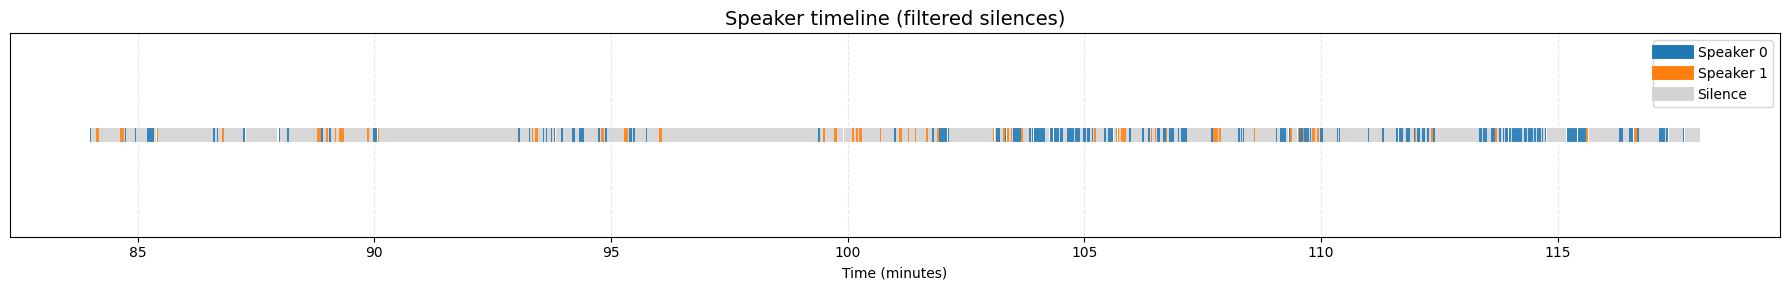

In [ ]:
# adding speaker change and labelization 
df['Speaker_Change'] = (df['Speaker_Label'] != df['Speaker_Label'].shift()).cumsum()


segments = df.groupby('Speaker_Change').agg({
    'Time_min': ['first', 'last'],
    'Speaker_Label': 'first'
}).reset_index()


segments.columns = ['Segment', 'Start', 'End', 'Speaker_Label']


segments['Duration'] = segments['End'] - segments['Start']
segments = segments[~((segments['Speaker_Label'] == 'Silence') & (segments['Duration'] < 0.008))]  # 0.008 min ≈ 0.5 sec


fig, ax = plt.subplots(figsize=(18, 3))

colors = {
    'Speaker 0': 'tab:blue',
    'Speaker 1': 'tab:orange',
    'Silence': 'lightgray'
}

for _, row in segments.iterrows():
    ax.hlines(
        y=1,
        xmin=row['Start'],
        xmax=row['End'],
        color=colors.get(row['Speaker_Label'], 'black'),
        linewidth=10,
        alpha=0.9
    )

ax.set_title("Speaker timeline (filtered silences)", fontsize=14)
ax.set_xlabel("Time (minutes)")
ax.set_yticks([])
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Leyenda
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color=color, lw=10, label=label)
    for label, color in colors.items()
]
ax.legend(handles=legend_handles, loc='upper right')

plt.tight_layout()
plt.show()


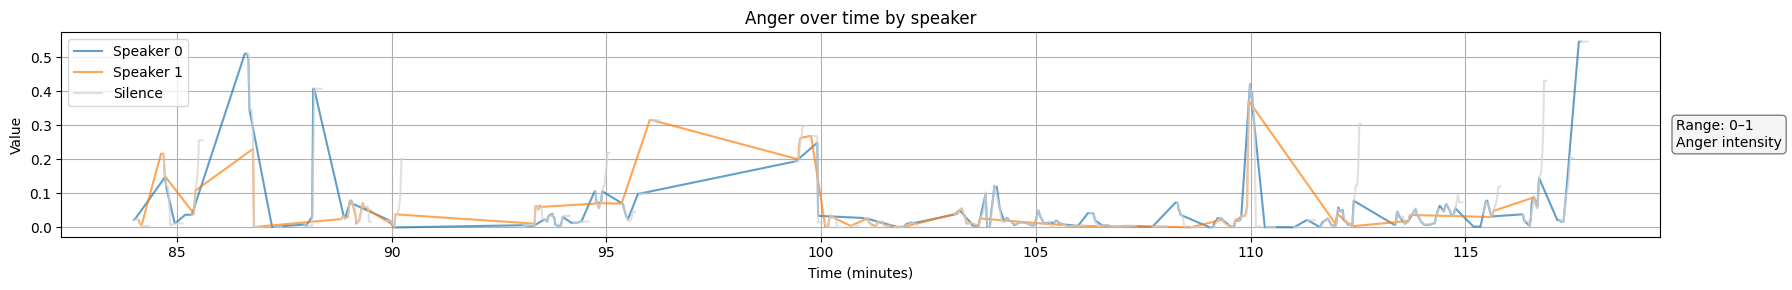

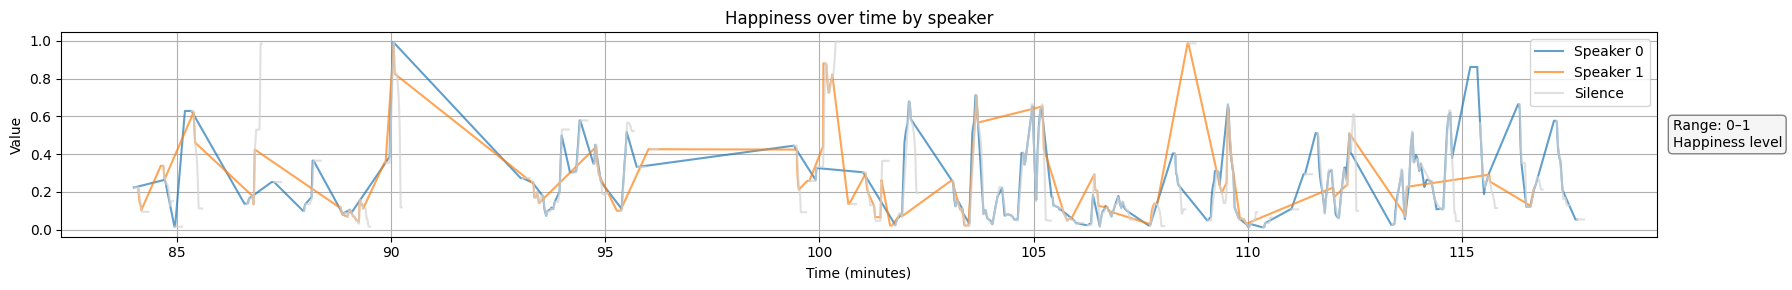

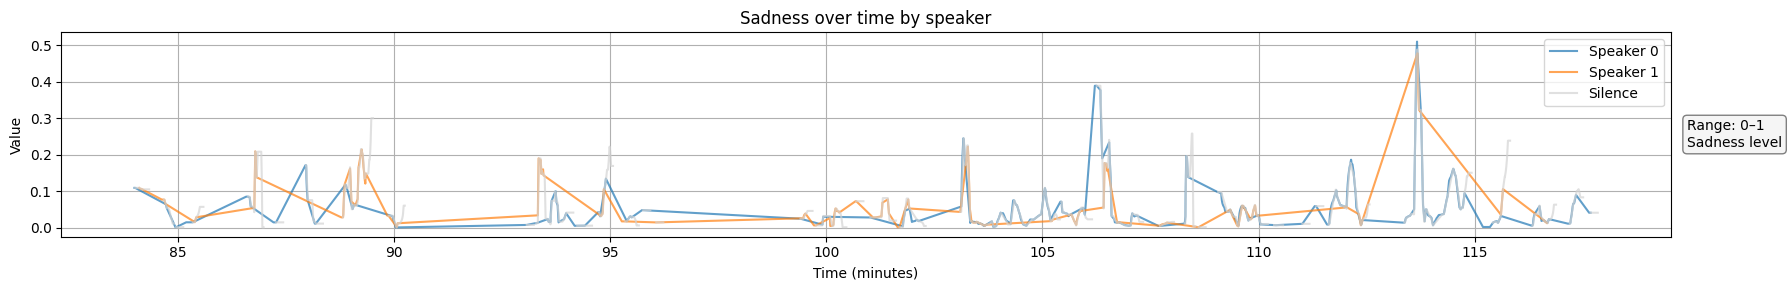

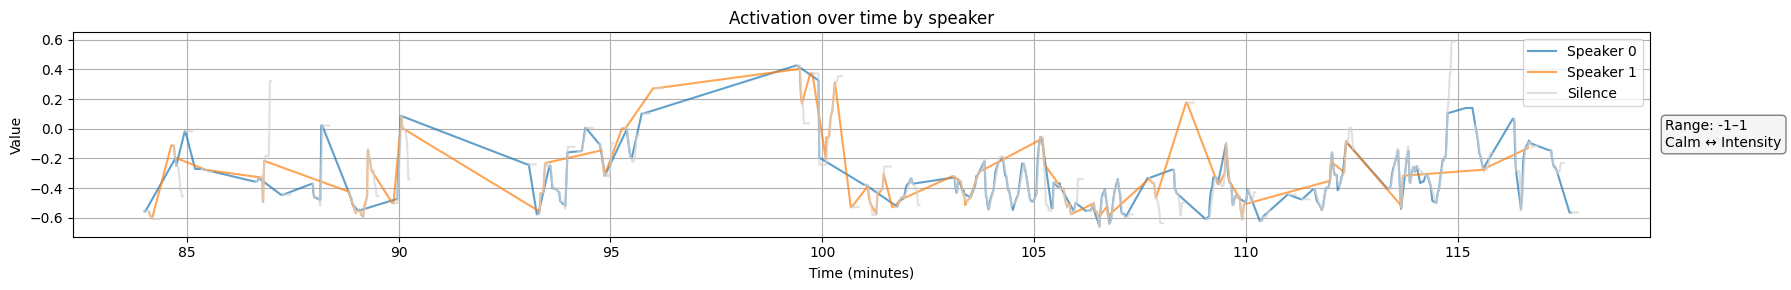

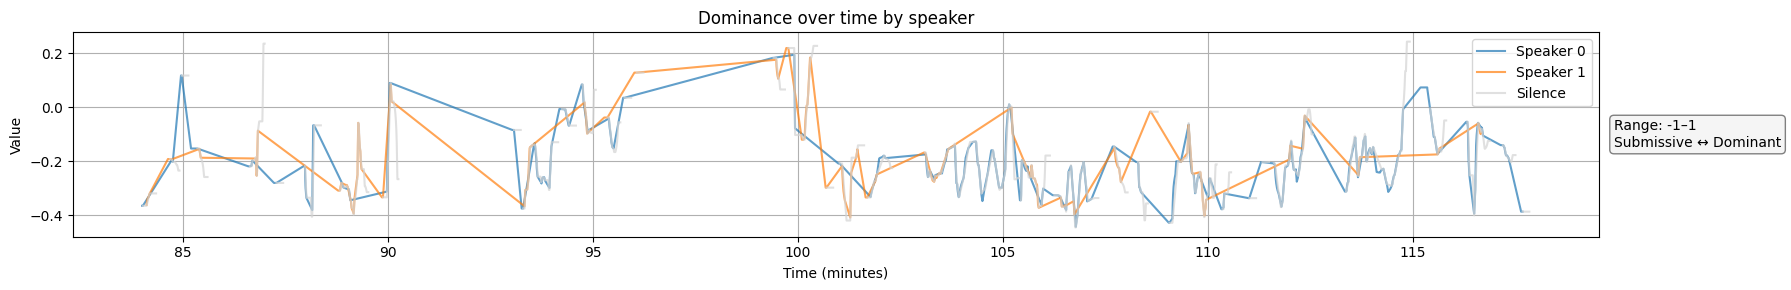

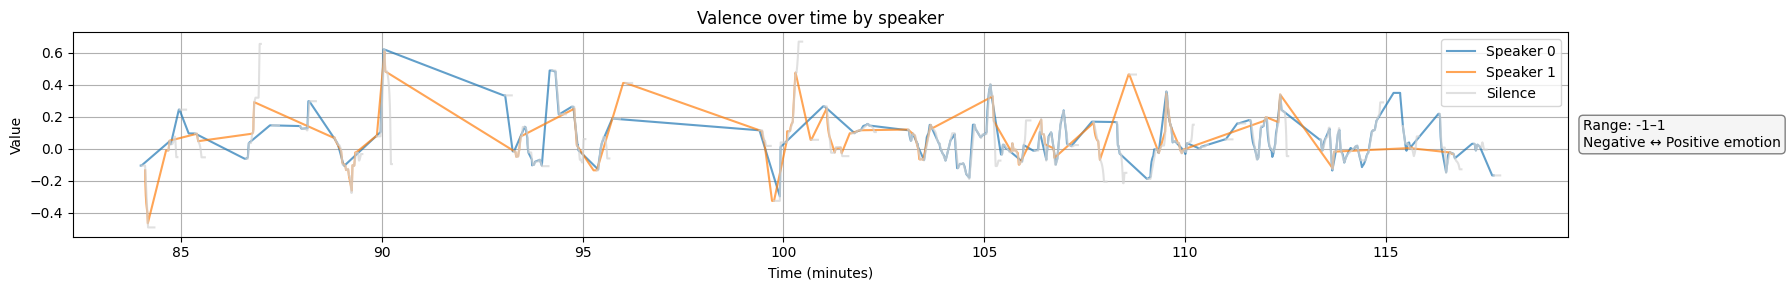

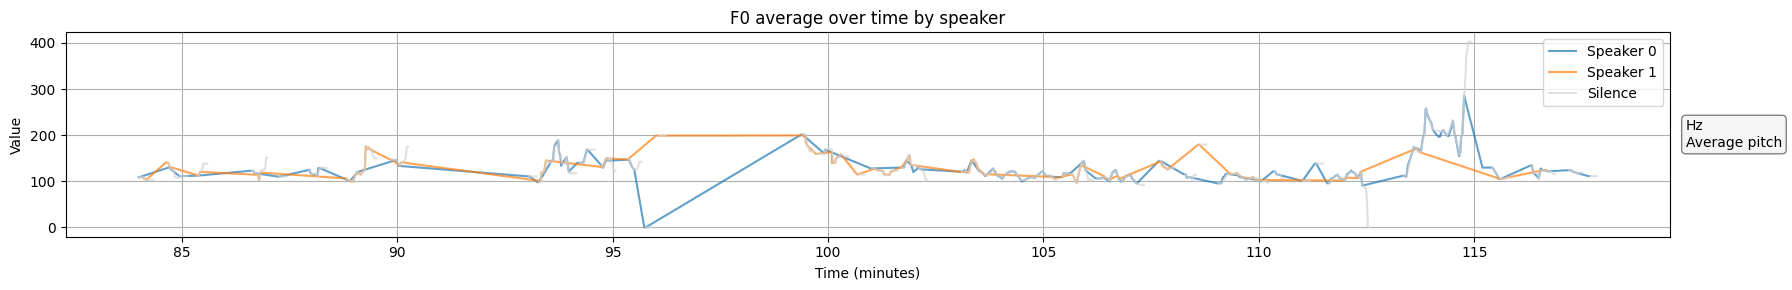

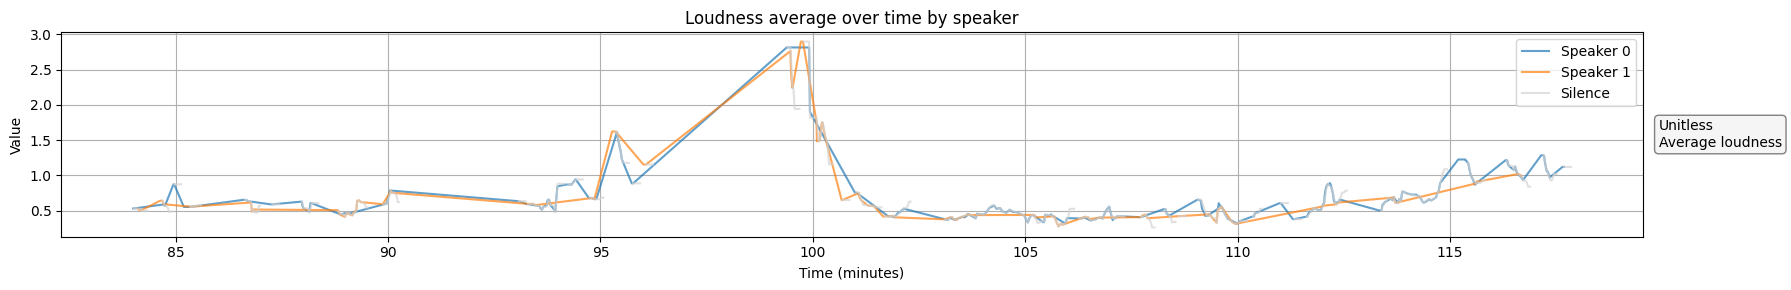

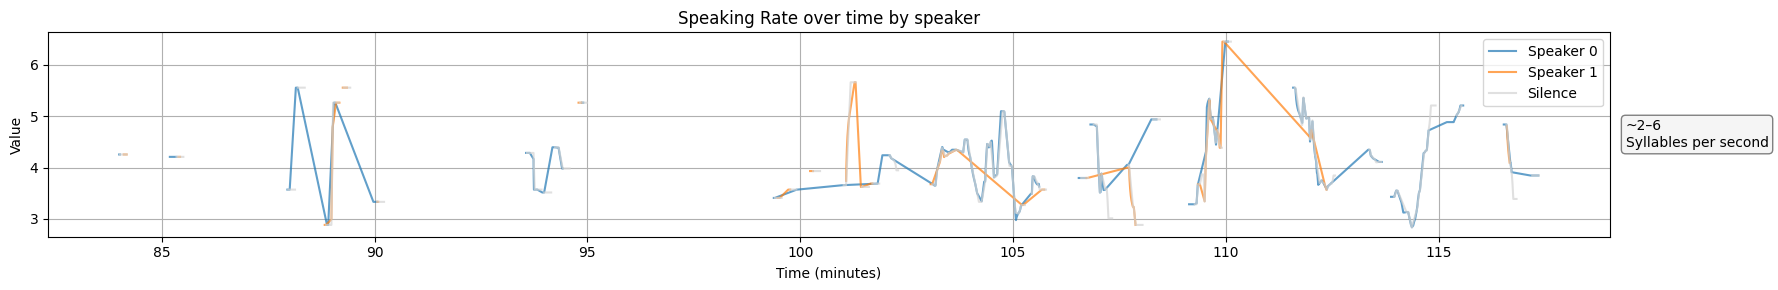

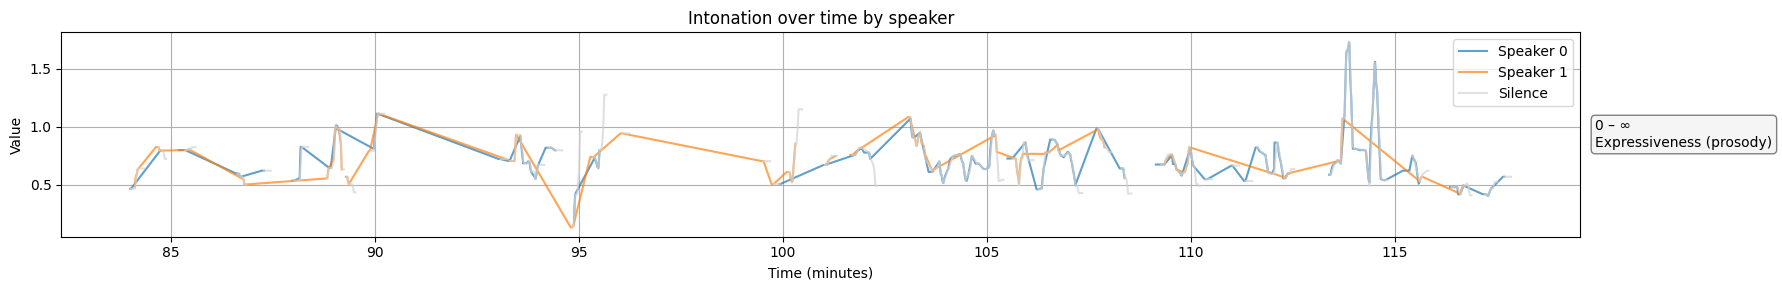

In [56]:


# Lista de métricas de voz que quieres graficar
voice_metrics = [
    'Voice_Anger', 'Voice_Happiness', 'Voice_Sadness', 'Voice_Activation',
    'Voice_Dominance', 'Voice_Valence', 'Voice_F0_average', 'Voice_Loudness_average',
    'Voice_Speaking_Rate', 'Voice_Intonation'
]

# Colores por speaker
speaker_colors = {
    'Speaker 0': 'tab:blue',
    'Speaker 1': 'tab:orange',
    'Silence': 'lightgray'  # Opcional si quieres mostrar también silencios
}

# Opcional: suavizado para hacer las curvas más limpias
df_smooth = df.sort_values('Time_min').copy()
df_smooth[voice_metrics] = df_smooth[voice_metrics].rolling(window=100, min_periods=1).mean()

# Plot: una figura por métrica
for metric in voice_metrics:
    plt.figure(figsize=(18, 3))
    for label, color in speaker_colors.items():
        mask = df_smooth['Speaker_Label'] == label
        plt.plot(
            df_smooth.loc[mask, 'Time_min'],
            df_smooth.loc[mask, metric],
            label=label,
            color=color,
            alpha=0.7
        )

    plt.title(f"{metric.replace('Voice_', '').replace('_', ' ')} over time by speaker")
    plt.xlabel("Time (minutes)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    info_text = metric_info.get(metric, "No info available")
    plt.text(
        1.01, 0.5, info_text,
        fontsize=10,
        transform=plt.gca().transAxes,
        va='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='whitesmoke', edgecolor='gray')
    )

    plt.tight_layout()
    plt.show()


In [55]:
metric_info = {
    'Voice_Anger': "Range: 0–1\nAnger intensity",
    'Voice_Happiness': "Range: 0–1\nHappiness level",
    'Voice_Neutrality': "Range: 0–1\nNeutral emotion",
    'Voice_Sadness': "Range: 0–1\nSadness level",
    'Voice_Activation': "Range: -1–1\nCalm ↔ Intensity",
    'Voice_Dominance': "Range: -1–1\nSubmissive ↔ Dominant",
    'Voice_Valence': "Range: -1–1\nNegative ↔ Positive emotion",
    'Voice_F0_minimum': "Hz (e.g., 60–1000)\nLowest pitch",
    'Voice_F0_maximum': "Hz\nHighest pitch",
    'Voice_F0_average': "Hz\nAverage pitch",
    'Voice_F0_variation': "Hz\nPitch variability",
    'Voice_Loudness_minimum': "Unitless\nMin loudness",
    'Voice_Loudness_maximum': "Unitless\nMax loudness",
    'Voice_Loudness_average': "Unitless\nAverage loudness",
    'Voice_Loudness_variation': "Unitless\nLoudness variation",
    'Voice_Speaking_Rate': "~2–6\nSyllables per second",
    'Voice_Speaking_Rate_Variation': "Seconds (var)\nRhythm consistency",
    'Voice_Intonation': "0 – ∞\nExpressiveness (prosody)",
    'Voice_Gender_Male_confidence': "0–1\nConfidence: male",
    'Voice_Gender_Female_confidence': "0–1\nConfidence: female",
    'Voice_Gender_Child_confidence': "0–1\nConfidence: child",
    'Voice_Age': "Years\nEstimated age"
}


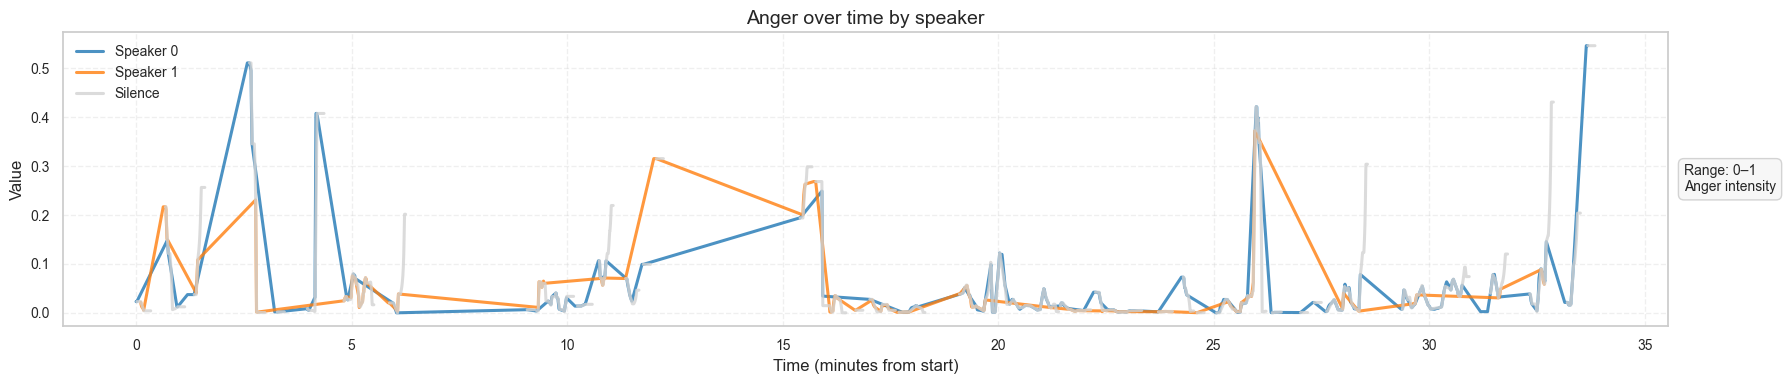

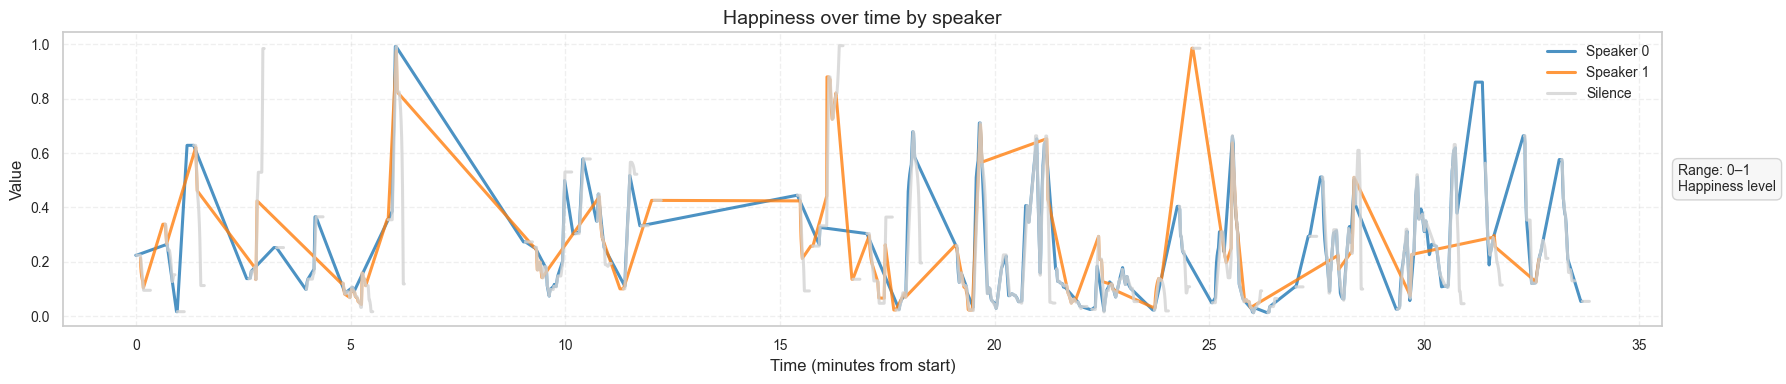

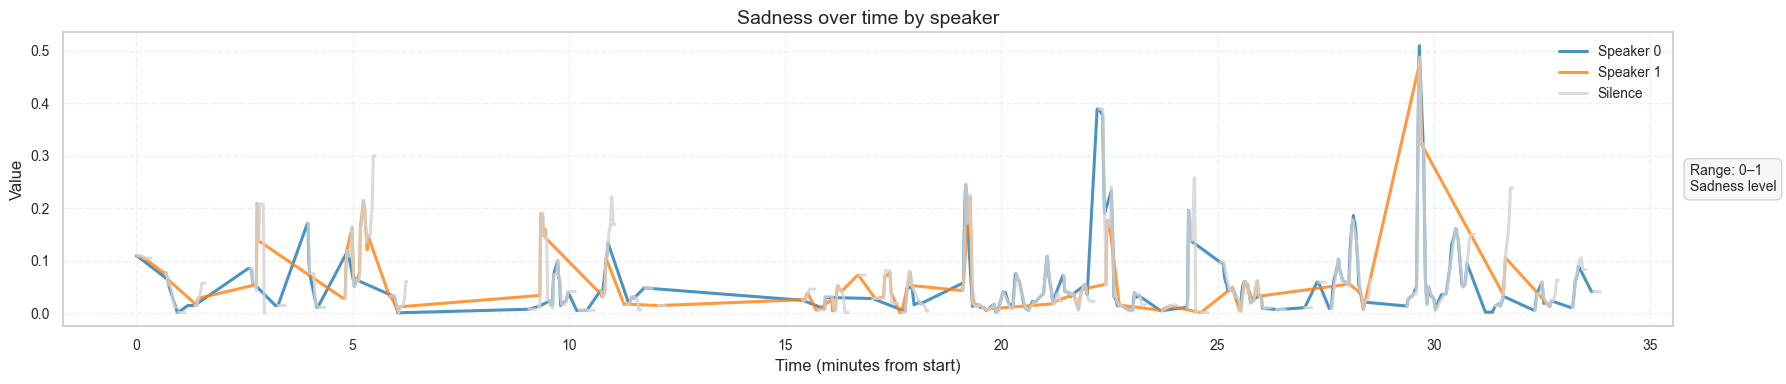

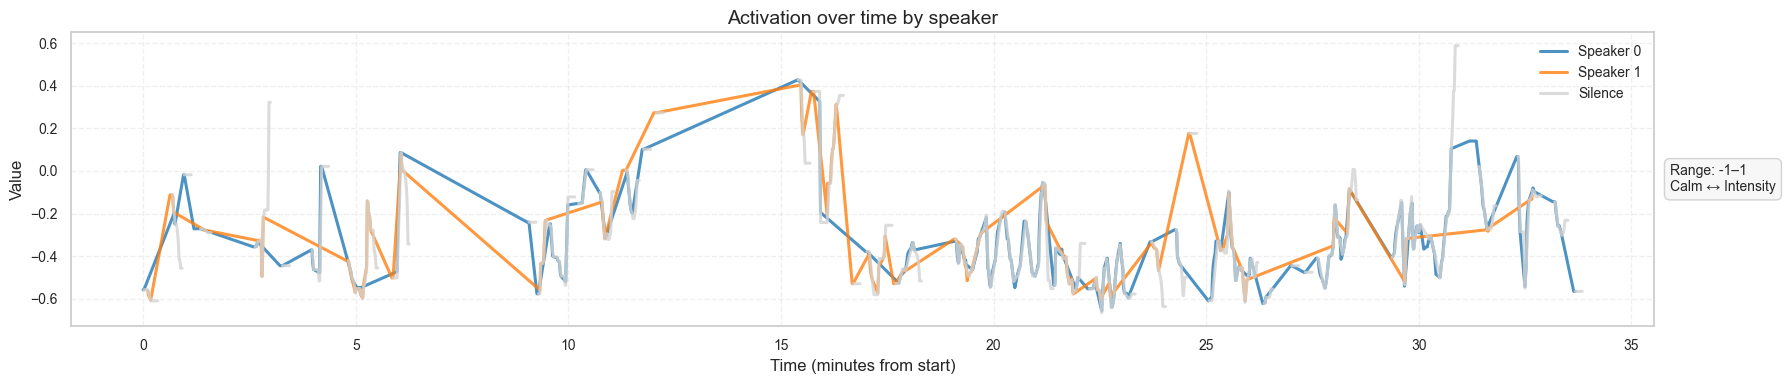

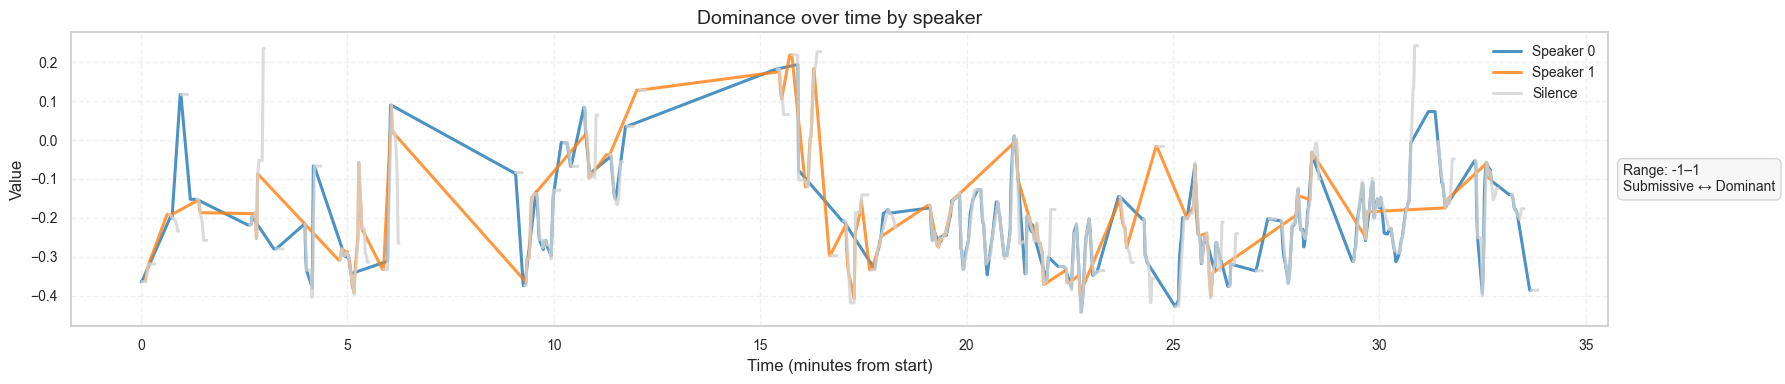

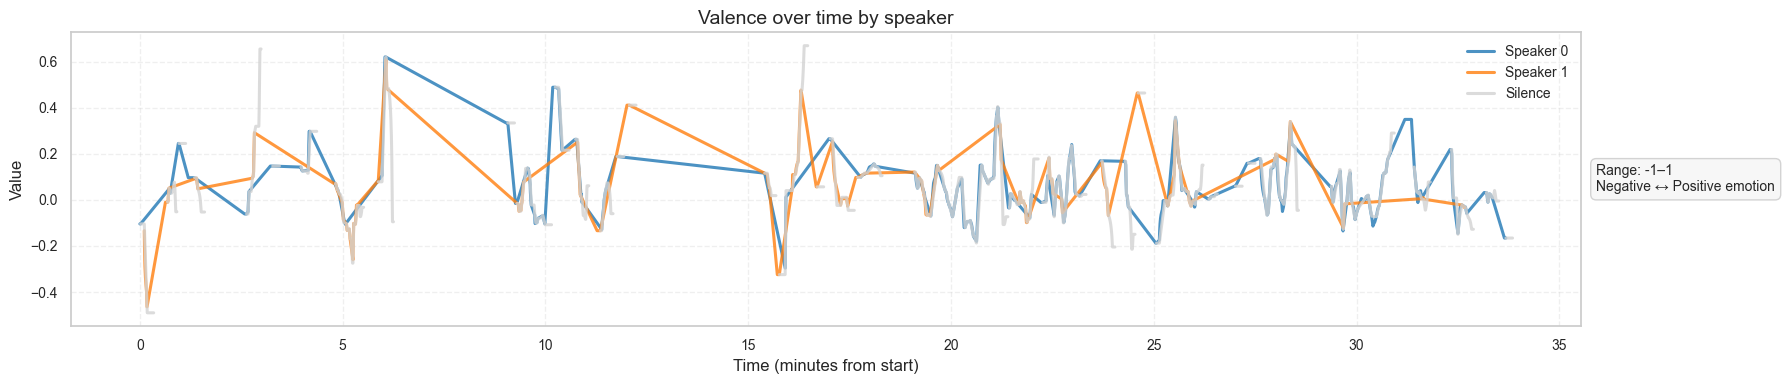

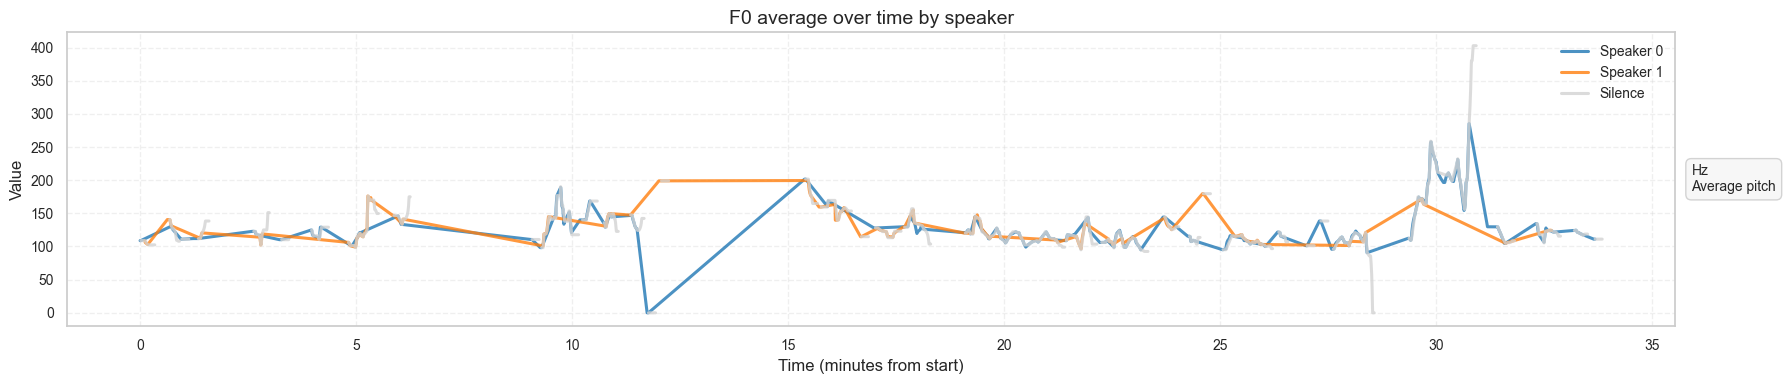

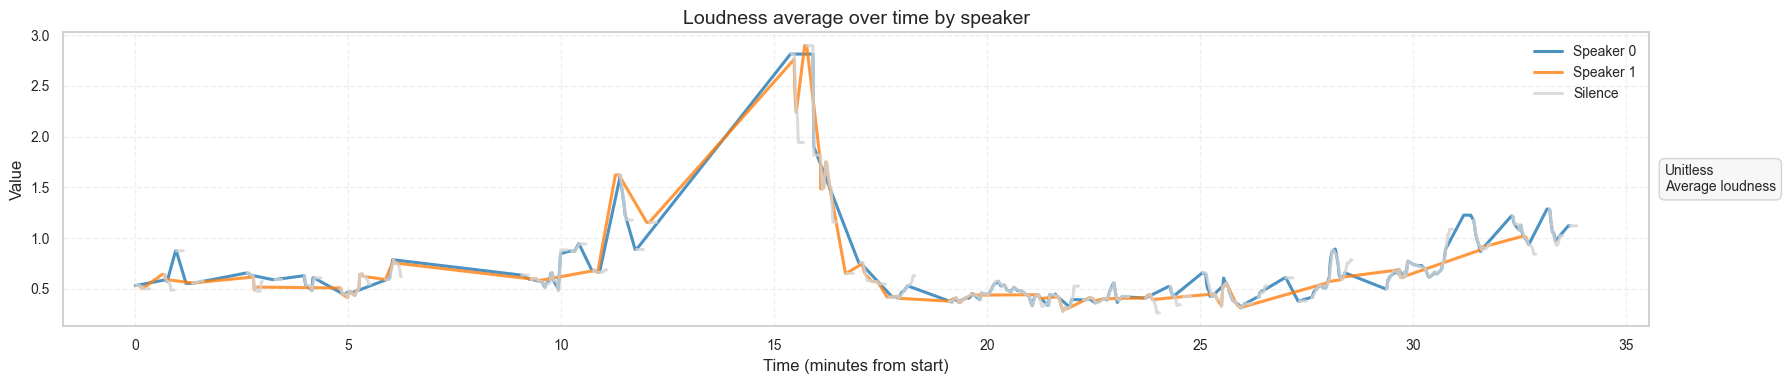

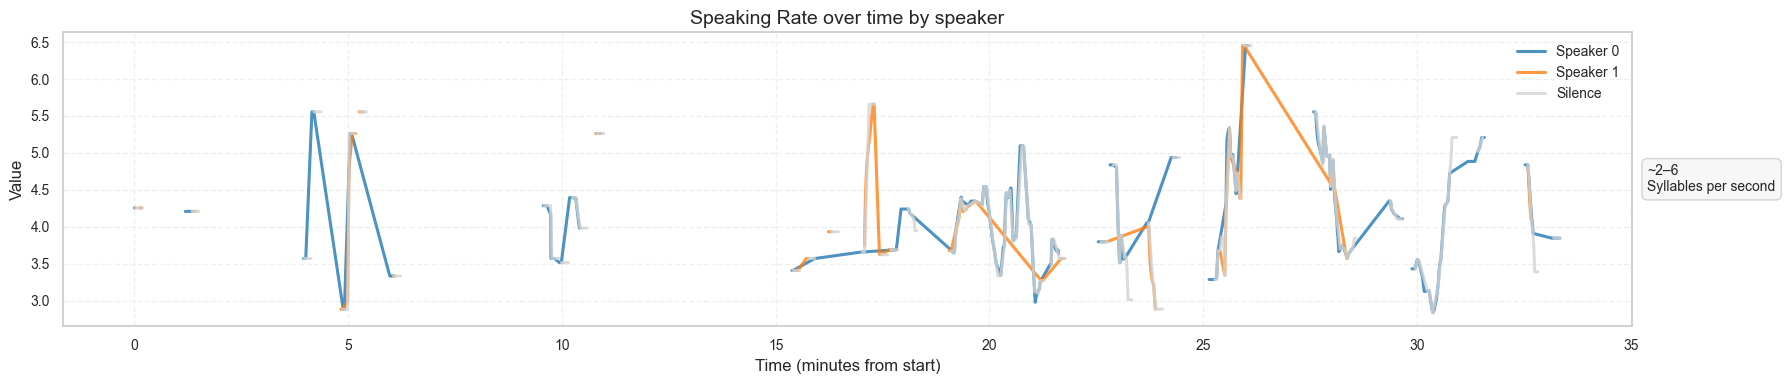

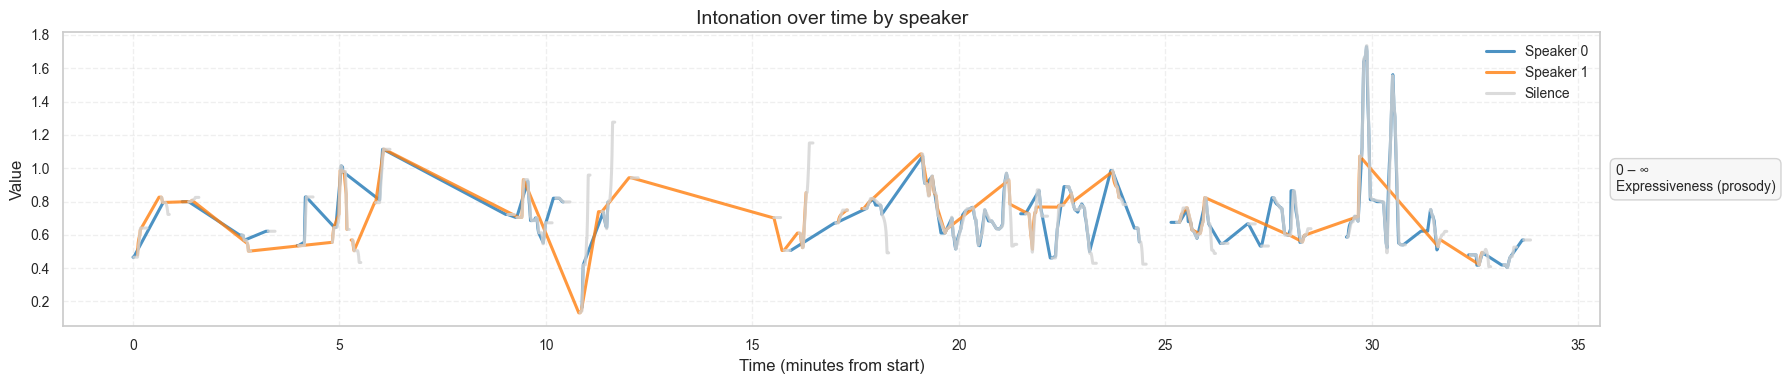

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo más limpio
sns.set(style="whitegrid")

# Ajustar tiempo para empezar en 0
df_smooth = df.sort_values('Time_min').copy()
df_smooth['Time_min_norm'] = df_smooth['Time_min'] - df_smooth['Time_min'].min()

# Suavizado (ajusta según resolución temporal)
rolling_window = 100
df_smooth[voice_metrics] = df_smooth[voice_metrics].rolling(window=rolling_window, min_periods=1).mean()

# Plot bonito para cada métrica
for metric in voice_metrics:
    plt.figure(figsize=(18, 4))
    
    for label, color in speaker_colors.items():
        mask = df_smooth['Speaker_Label'] == label
        plt.plot(
            df_smooth.loc[mask, 'Time_min_norm'],
            df_smooth.loc[mask, metric],
            label=label,
            color=color,
            linewidth=2.2,
            alpha=0.8
        )

    plt.title(f"{metric.replace('Voice_', '').replace('_', ' ')} over time by speaker", fontsize=14)
    plt.xlabel("Time (minutes from start)", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(frameon=False, fontsize=10)
    
    # Caja de información de la métrica
    info_text = metric_info.get(metric, "No info available")
    plt.text(
        1.01, 0.5, info_text,
        fontsize=10,
        transform=plt.gca().transAxes,
        va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='#f7f7f7', edgecolor='lightgray')
    )

    plt.tight_layout()
    plt.show()


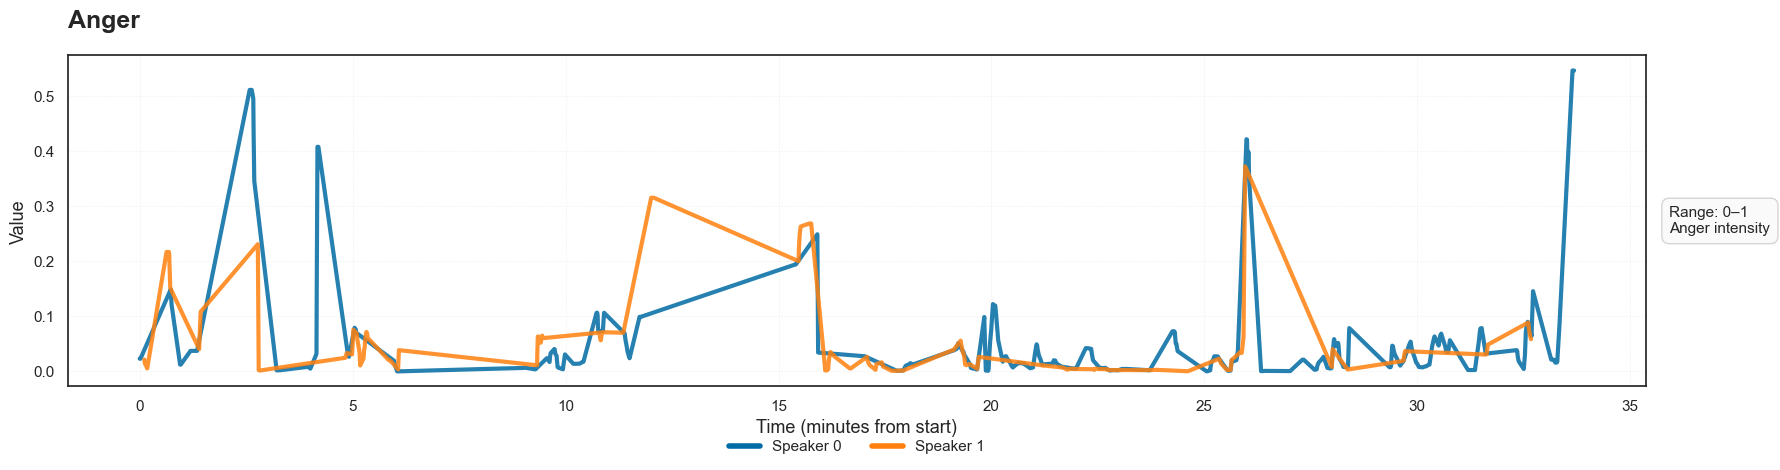

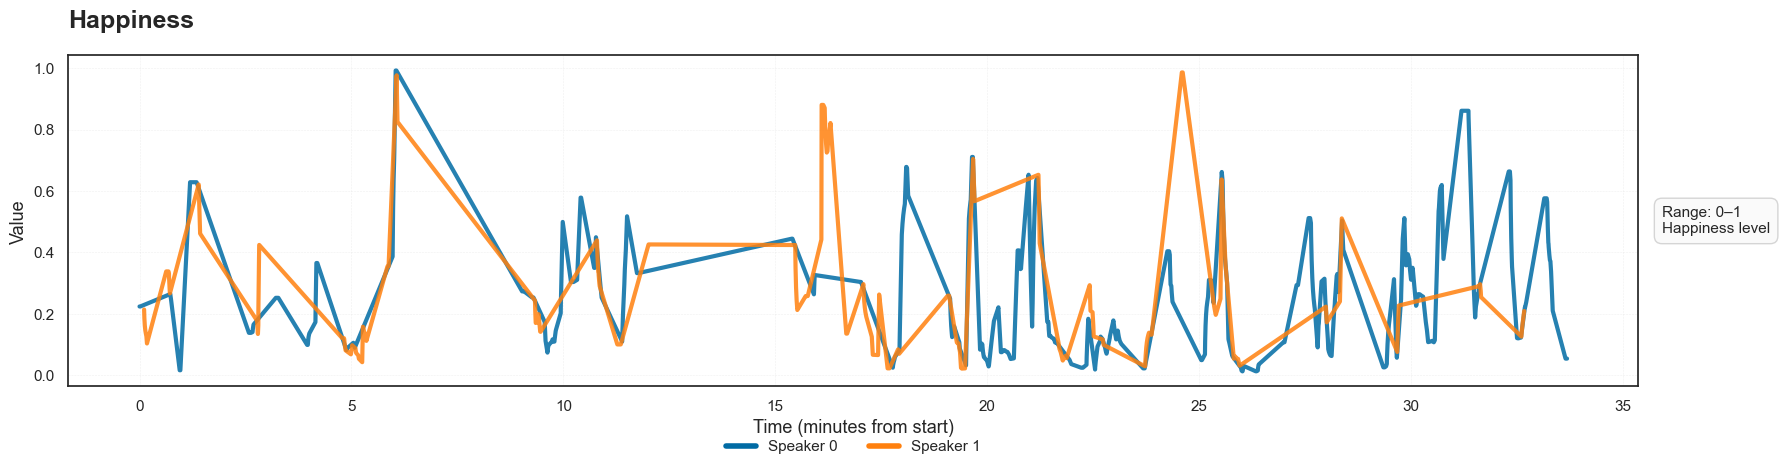

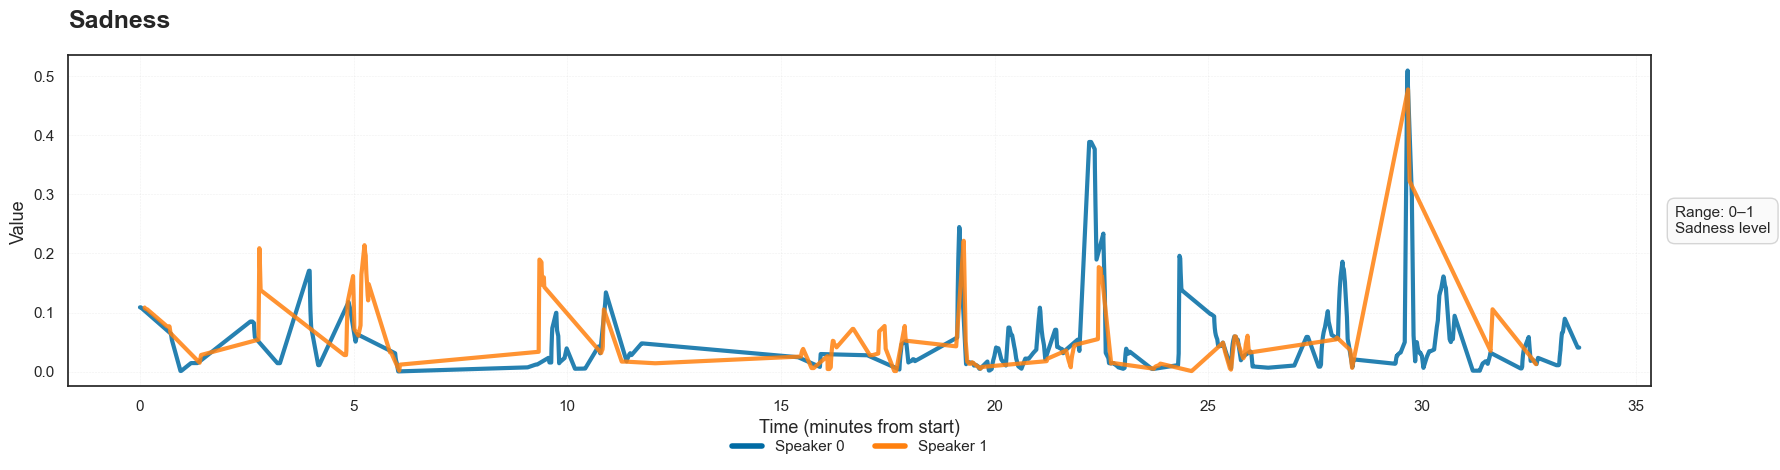

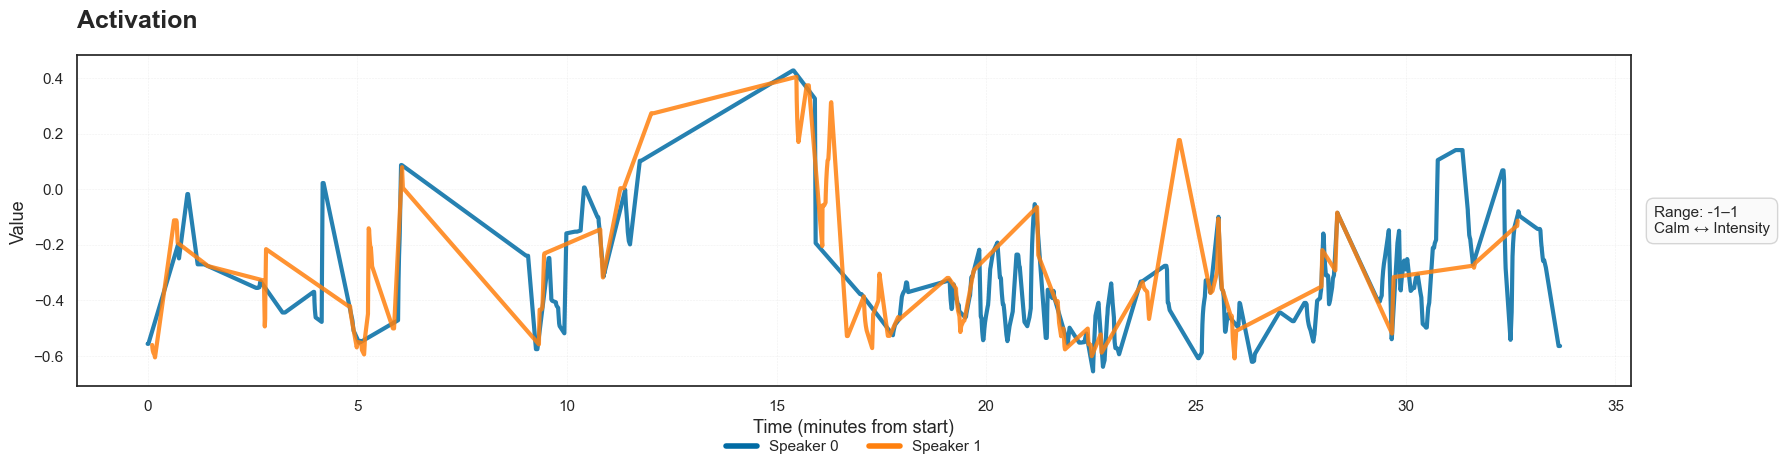

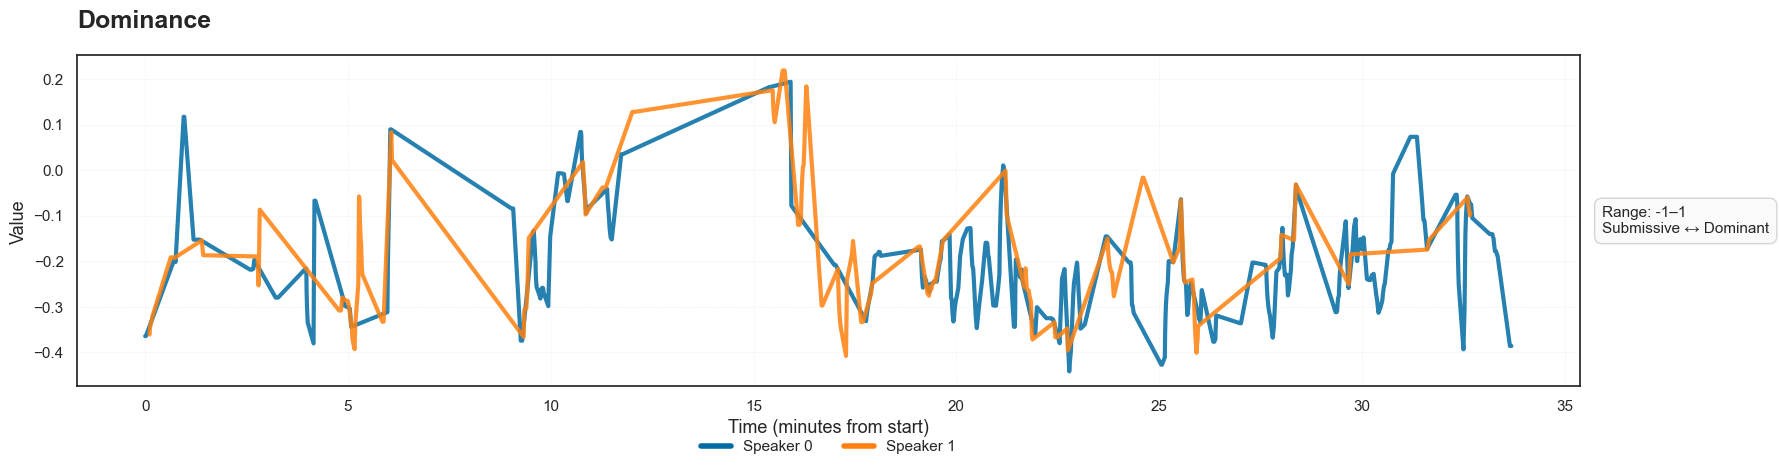

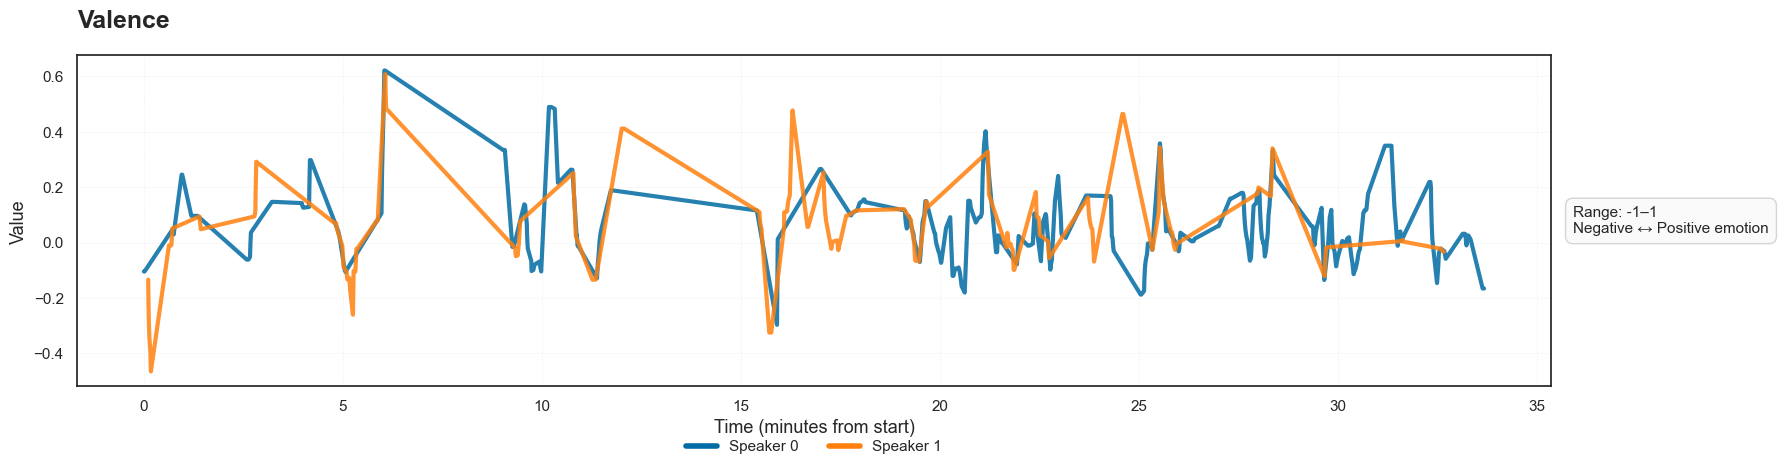

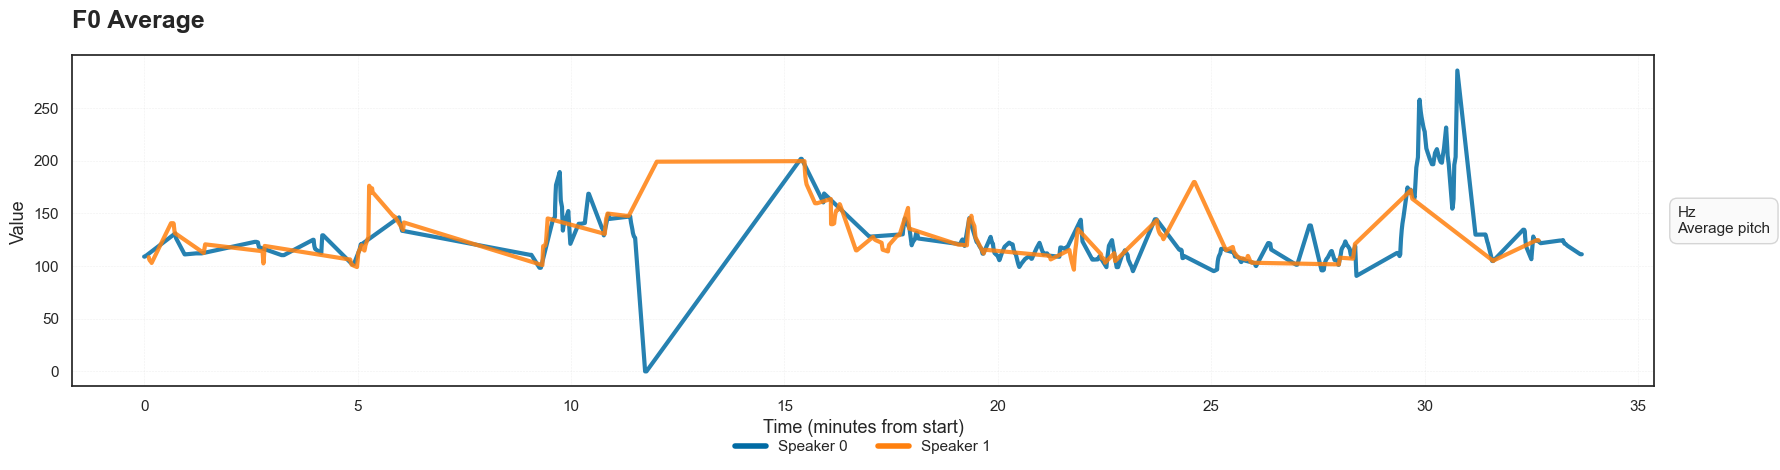

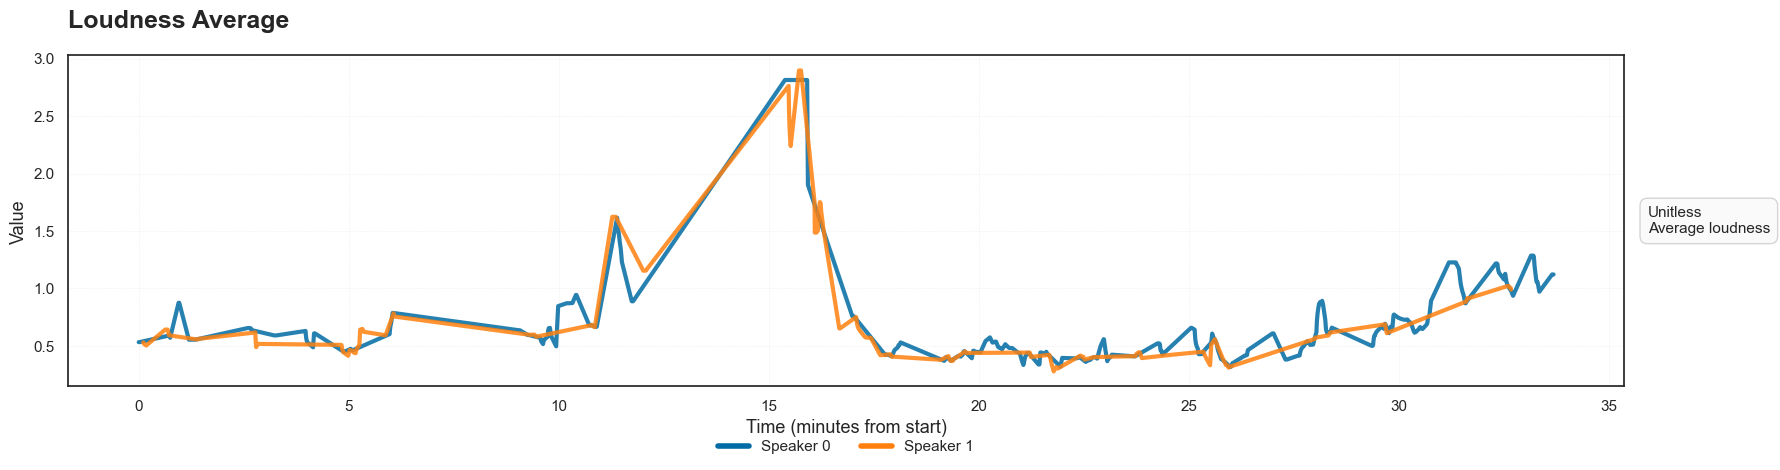

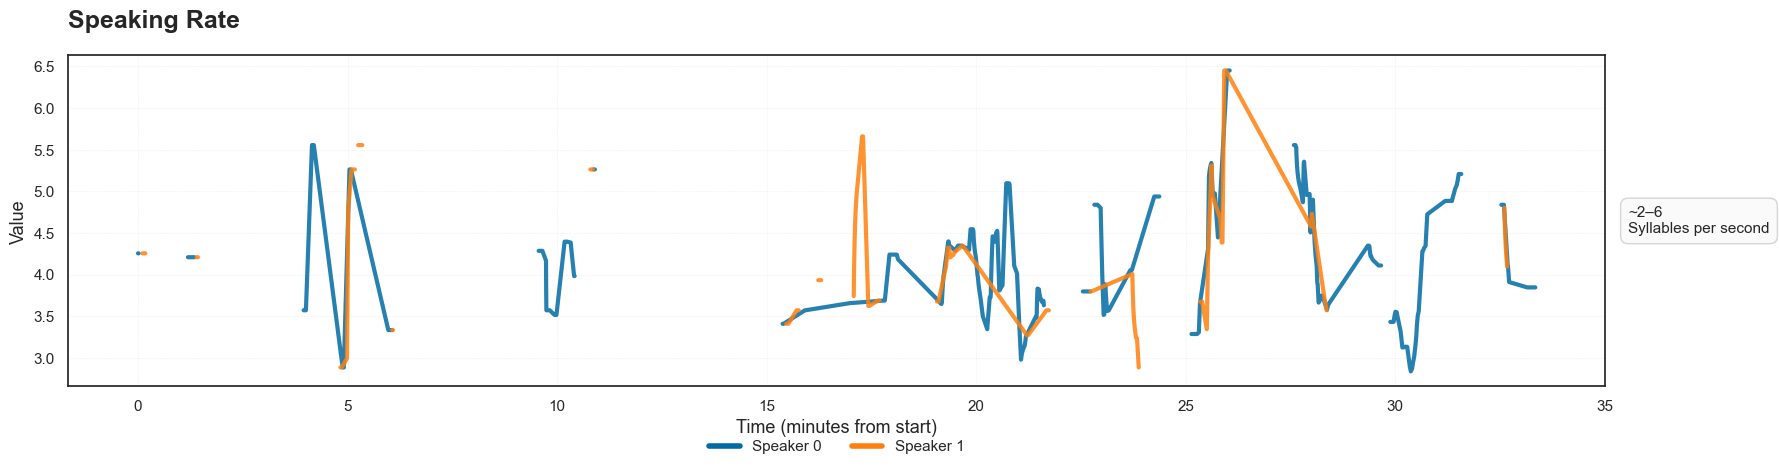

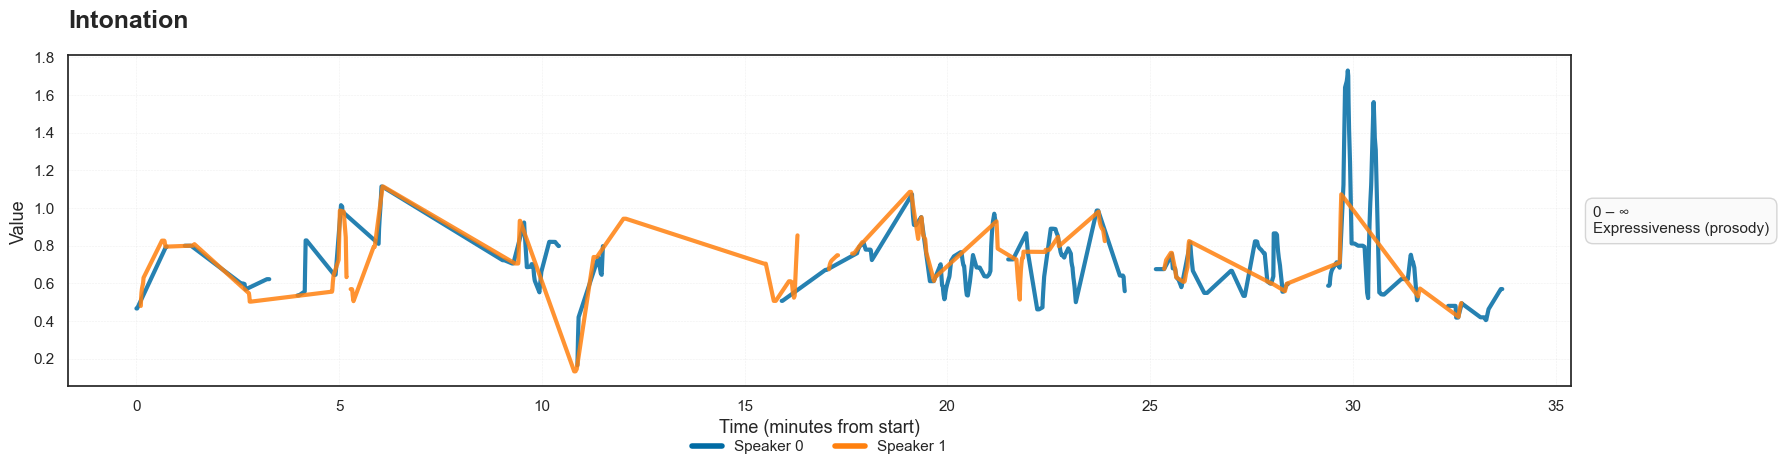

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Estilo general elegante
sns.set_theme(style="white", font="Arial", font_scale=1.2)

# Normalizar tiempo desde cero
df_smooth = df.copy()
df_smooth = df_smooth.sort_values('Time_min')
df_smooth['Time_min_norm'] = df_smooth['Time_min'] - df_smooth['Time_min'].min()

# Suavizado (ajustar según tus datos)
rolling_window = 100
df_smooth[voice_metrics] = df_smooth[voice_metrics].rolling(window=rolling_window, min_periods=1).mean()

# Paleta de color personalizada y moderna
speaker_colors = {
    'Speaker 0': '#006BA4',  # Azul moderno
    'Speaker 1': '#FF800E',  # Naranja moderno
}

# Gráfico por métrica
for metric in voice_metrics:
    fig, ax = plt.subplots(figsize=(18, 5))

    # Graficar solo los hablantes (sin Silence)
    for label in ['Speaker 0', 'Speaker 1']:
        color = speaker_colors[label]
        mask = df_smooth['Speaker_Label'] == label
        ax.plot(
            df_smooth.loc[mask, 'Time_min_norm'],
            df_smooth.loc[mask, metric],
            label=label,
            color=color,
            linewidth=3,
            alpha=0.85
        )

    # Título elegante
    ax.set_title(
        metric.replace('Voice_', '').replace('_', ' ').title(),
        fontsize=18,
        loc='left',
        pad=20,
        fontweight='bold'
    )

    # Ejes
    ax.set_xlabel("Time (minutes from start)", fontsize=13)
    ax.set_ylabel("Value", fontsize=13)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.3)

    # Leyenda limpia, afuera del gráfico
    handles = [
        Line2D([0], [0], color=speaker_colors[label], lw=4, label=label)
        for label in ['Speaker 0', 'Speaker 1']
    ]
    ax.legend(
        handles=handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.12),
        ncol=2,
        frameon=False,
        fontsize=11
    )

    # Descripción de métrica (si existe)
    info_text = metric_info.get(metric, "")
    ax.annotate(
        info_text,
        xy=(1.015, 0.5), xycoords='axes fraction',
        fontsize=11,
        ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.5', fc='#FAFAFA', ec='lightgray', alpha=0.95)
    )

    # Margen limpio
    plt.subplots_adjust(right=0.87)
    plt.tight_layout()
    plt.show()
